<a href="https://colab.research.google.com/github/eduardoluisvieira/Mineracao-de-Dados/blob/main/Analise_E_commerce_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Análise Exploratória do E-Commerce no Brasil**


---



In [235]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import statistics as sts
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [115]:
customers = pd.read_csv('https://raw.githubusercontent.com/eduardoluisvieira/Datasets/main/e-commerce/olist_customers_dataset.csv', sep = ',')

In [116]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [117]:
# não há nenhuma coluna com valor nulo a ser tratada
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [118]:
customers.describe()


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [119]:
itens = pd.read_csv('https://raw.githubusercontent.com/eduardoluisvieira/Datasets/main/e-commerce/olist_order_items_dataset.csv',sep = ',')

In [120]:
itens.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [121]:
itens.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [122]:
# não há nenhuma coluna com valor nulo a ser tratada
itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [123]:
 len(itens['order_id'].unique())

98666

In [124]:
payment = pd.read_csv('https://raw.githubusercontent.com/eduardoluisvieira/Datasets/main/e-commerce/olist_order_payments_dataset.csv',sep=',')

In [125]:
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [126]:
# não há nenhuma coluna com valor nulo a ser tratada
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [127]:
 len(payment['order_id'].unique())

99440

In [246]:
orders = pd.read_csv('https://raw.githubusercontent.com/eduardoluisvieira/Datasets/main/e-commerce/olist_orders_dataset.csv',sep=',')

In [129]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [130]:
# não há nenhuma coluna com valor nulo a ser tratada
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [131]:
 len(orders['order_id'].unique())

99441

**Tratamento dos dados NaN da coluna order_approved_at**

In [132]:
# contagem das linhas NaN da coluna order_approved_at
orders['order_approved_at'].isna().sum()

160

In [133]:
orders['order_approved_at'].describe()

count                   99281
unique                  90733
top       2018-02-27 04:31:10
freq                        9
Name: order_approved_at, dtype: object

In [134]:
# localizando as linhas com valores nulos NaN da coluna order_approved_at
orders.loc[orders['order_approved_at'].isna()].head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
3056,ddaec6fff982b13e7e048b627a11d6da,68f4ad79cc0c2ad06e19088f5c00e9fa,canceled,2016-10-04 19:41:32,NaN,NaN,NaN,2016-11-16 00:00:00
3094,5290c34bd38a8a095b885f13958db1e1,92af427e290117f39d9ff908566072e0,canceled,2018-08-21 10:25:18,NaN,NaN,NaN,2018-09-06 00:00:00
3684,03310aa823a66056268a3bab36e827fb,25dbbf0c477fd4ae0880aaffbb12e8b3,canceled,2018-08-07 16:33:59,NaN,NaN,NaN,2018-09-04 00:00:00
4373,4c8b9947280829d0a8b7e81cc249b875,403c35c4d8813bf67b3d396b91ca1619,canceled,2018-08-09 14:54:47,NaN,NaN,NaN,2018-08-21 00:00:00
4939,b13ea375fe9c728832688264638f84cf,0dc5884bc5ffba283678229f27e07ff9,canceled,2018-08-22 18:52:29,NaN,NaN,NaN,2018-09-19 00:00:00


In [135]:
# Todas ordens que foram canceladas não atribuem valores para as colunas order_approved_at	order_delivered_carrier_date	order_delivered_customer_date
# Não vamos atribuir valores a essas colunas por indicaria uma data falsa para a análise

In [136]:
products = pd.read_csv('https://raw.githubusercontent.com/eduardoluisvieira/Datasets/main/e-commerce/olist_products_dataset.csv',sep=',')

In [137]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [138]:
# não há nenhuma coluna com valor nulo a ser tratada
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Tratamento dos dados NaN da colunas**

In [139]:
# soma dos valores nulos na coluna
products['product_category_name'].isna().sum()

610

In [161]:
products['product_category_name'].describe()

count               32341
unique                 73
top       cama_mesa_banho
freq                 3029
Name: product_category_name, dtype: object

In [160]:
products.loc[products['product_category_name'].isna()].head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
244,e10758160da97891c2fdcbc35f0f031d,NaN,NaN,NaN,NaN,2200.0,16.0,2.0,11.0
294,39e3b9b12cd0bf8ee681bbc1c130feb5,NaN,NaN,NaN,NaN,300.0,16.0,7.0,11.0
299,794de06c32a626a5692ff50e4985d36f,NaN,NaN,NaN,NaN,300.0,18.0,8.0,14.0
347,7af3e2da474486a3519b0cba9dea8ad9,NaN,NaN,NaN,NaN,200.0,22.0,14.0,14.0
428,629beb8e7317703dcc5f35b5463fd20e,NaN,NaN,NaN,NaN,1400.0,25.0,25.0,25.0


In [162]:
# Atribuição do valor 'outros' para a categoria dos itens nulos
products_cat = products
products_cat.loc[products_cat['product_category_name'].isna()] = 'outros'
products_cat

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [163]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  32951 non-null  object
 1   product_category_name       32951 non-null  object
 2   product_name_lenght         32951 non-null  object
 3   product_description_lenght  32951 non-null  object
 4   product_photos_qty          32951 non-null  object
 5   product_weight_g            32950 non-null  object
 6   product_length_cm           32950 non-null  object
 7   product_height_cm           32950 non-null  object
 8   product_width_cm            32950 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB


In [164]:
# soma dos valores nulos nas colunas
Nulos = [products['product_weight_g'].isna().sum(),products['product_length_cm'].isna().sum(),products['product_height_cm'].isna().sum(),products['product_width_cm'].isna().sum()]
Nulos

[1, 1, 1, 1]

In [165]:
# Atribuição do valor 'outros' para aa colunas dos itens nulos acima
products_length = products
products_length.loc[products_length['product_length_cm'].isna()] = '1'
products_length

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [166]:
sellers = pd.read_csv('https://raw.githubusercontent.com/eduardoluisvieira/Datasets/main/e-commerce/olist_sellers_dataset.csv',sep=',')

In [ ]:
sellers.head()

In [167]:
# não há nenhuma coluna com valor nulo a ser tratada
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [168]:
product_category = pd.read_csv('https://raw.githubusercontent.com/eduardoluisvieira/Datasets/main/e-commerce/product_category_name_translation.csv',sep=',')

In [169]:
# não há nenhuma coluna com valor nulo a ser tratada
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [170]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Montando o dataset completo**

In [171]:
# Tabela de produtos, excluir colunas que não serão usadas - product_id	product_category_name product_weight_g
products = products.drop('product_description_lenght',axis=1)


In [ ]:
products

In [172]:
products = products.drop('product_name_lenght',axis=1)
products = products.drop('product_photos_qty',axis=1)
products = products.drop('product_height_cm',axis=1)
products = products.drop('product_width_cm',axis=1)
products = products.drop('product_length_cm',axis=1)
products
	


,product_id,product_category_name,product_weight_g
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0
...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,12300.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,1700.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,1400.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,700.0


In [173]:
product_category = product_category.drop('product_category_name_english',axis=1)
product_category

,product_category_name
0,beleza_saude
1,informatica_acessorios
2,automotivo
3,cama_mesa_banho
4,moveis_decoracao
...,...
66,flores
67,artes_e_artesanato
68,fraldas_higiene
69,fashion_roupa_infanto_juvenil


In [174]:
sellers = sellers.drop('seller_zip_code_prefix',axis=1)
sellers

,seller_id,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP
...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS


In [175]:
itens = itens.drop('shipping_limit_date',axis=1)
itens

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14
...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72


In [176]:
orders = orders.drop('order_approved_at',axis=1)
orders = orders.drop('order_delivered_carrier_date',axis=1)
orders = orders.drop('order_estimated_delivery_date',axis=1)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54


In [177]:
# Inner Join dos dataframes
df1 = pd.merge(orders,customers)
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [178]:
df2 = pd.merge(df1,itens)
df2

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59


In [179]:
df3 = pd.merge(df2,products)
df3

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_weight_g
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,500.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-18 14:44:43,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,utilidades_domesticas,500.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-07 18:30:01,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,utilidades_domesticas,500.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-11-07 18:04:59,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,utilidades_domesticas,500.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,perfumaria,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111041,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-23 15:36:29,fb9310710003399b031add3e55f34719,3318,sao paulo,SP,1,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,356.00,18.12,esporte_lazer,2800.0
111042,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-23 15:36:29,fb9310710003399b031add3e55f34719,3318,sao paulo,SP,2,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,356.00,18.12,esporte_lazer,2800.0
111043,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2018-01-26 15:45:14,a49e8e11e850592fe685ae3c64b40eca,83870,campo do tenente,PR,1,3d2c44374ee42b3003a470f3e937a2ea,ce248b21cb2adc36282ede306b7660e5,55.90,15.14,instrumentos_musicais,300.0
111044,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,72.00,13.08,beleza_saude,1175.0


In [180]:
df4 = pd.merge(df3,sellers)
df4

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_weight_g,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,500.0,maua,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-18 14:44:43,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,utilidades_domesticas,500.0,maua,SP
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-07 18:30:01,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,utilidades_domesticas,500.0,maua,SP
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-11-07 18:04:59,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,utilidades_domesticas,500.0,maua,SP
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-16 19:03:36,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,1,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,75.90,7.79,bebes,238.0,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111041,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-09 15:06:57,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,1,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,79.00,14.13,construcao_ferramentas_iluminacao,750.0,porto ferreira,SP
111042,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,NaN,78a159045124eb7601951b917a42034f,89111,gaspar,SC,1,241a1ffc9cf969b27de6e72301020268,8501d82f68d23148b6d78bb7c4a42037,19.70,10.96,automotivo,400.0,blumenau,SC
111043,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-08-02 22:47:35,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,fortaleza,CE,1,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,399.00,45.07,moveis_decoracao,2100.0,americana,SP
111044,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-06-12 23:11:29,e55e436481078787e32349cee9febf5e,39803,teofilo otoni,MG,1,6e1c2008dea1929b9b6c27fa01381e90,edf3fabebcc20f7463cc9c53da932ea8,219.90,24.12,moveis_decoracao,5900.0,sao paulo,SP


In [181]:
df5 = pd.merge(df4,product_category)
df5

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_weight_g,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,500.0,maua,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-18 14:44:43,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,utilidades_domesticas,500.0,maua,SP
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-07 18:30:01,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,utilidades_domesticas,500.0,maua,SP
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-11-07 18:04:59,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,utilidades_domesticas,500.0,maua,SP
4,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-28 20:12:20,7a1de9bde89aedca8c5fbad489c5571c,1315,sao paulo,SP,2,be03d93320192443b8fa24c0ca6ead98,3504c0cb71d7fa48d967e0e4c94d59d9,46.80,67.70,utilidades_domesticas,775.0,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111017,4cbf1cc60a2d1704a70e11ee8be1510a,406c8e1382162dc6bef214e0c01fc297,delivered,2018-01-01 17:03:13,2018-01-10 13:45:30,9b8844d7cceb1277e6508cce966e4a09,6767,taboao da serra,SP,1,2365562e74dd46f5e99cdc696c504cea,c731d18cea9bf687ffee82a241c25b11,112.00,18.03,la_cuisine,1750.0,concordia,SC
111018,fbd9022ebf9271e1952ca884a972d1bd,3e46b833c6f5d7827700b8ef99db2e08,delivered,2017-07-22 17:55:13,2017-07-27 19:03:29,578035514ad8238fa724f24b4aabc1df,88705,tubarao,SC,1,2365562e74dd46f5e99cdc696c504cea,c731d18cea9bf687ffee82a241c25b11,105.00,14.60,la_cuisine,1750.0,concordia,SC
111019,30b0ea32347476f4b427daf62e09a5bb,9d9cfbce48737214f23bf294daf3c6f7,delivered,2017-08-12 19:20:39,2017-08-17 18:28:10,6c861f46d09c560422f6ba6b33c017fe,9371,maua,SP,1,b52e7c92200ed9874e77bc09b5ed4d40,c731d18cea9bf687ffee82a241c25b11,174.00,39.06,la_cuisine,7600.0,concordia,SC
111020,1ce0acf125f1bcd636276dd213363196,d11524bb77c28efad04e4467eac8a660,delivered,2017-07-31 18:10:29,2017-08-09 20:38:07,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,1,cc9e875c2df286dbed83efe01191162c,c731d18cea9bf687ffee82a241c25b11,129.00,26.18,la_cuisine,2700.0,concordia,SC


In [182]:
df6 = pd.merge(df5,payment)
df6

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,...,price,freight_value,product_category_name,product_weight_g,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,...,29.99,8.72,utilidades_domesticas,500.0,maua,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,...,29.99,8.72,utilidades_domesticas,500.0,maua,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,...,29.99,8.72,utilidades_domesticas,500.0,maua,SP,2,voucher,1,18.59
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-18 14:44:43,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,...,29.99,7.78,utilidades_domesticas,500.0,maua,SP,1,credit_card,3,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-07 18:30:01,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,...,29.99,7.78,utilidades_domesticas,500.0,maua,SP,1,credit_card,1,37.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115872,30b0ea32347476f4b427daf62e09a5bb,9d9cfbce48737214f23bf294daf3c6f7,delivered,2017-08-12 19:20:39,2017-08-17 18:28:10,6c861f46d09c560422f6ba6b33c017fe,9371,maua,SP,1,...,174.00,39.06,la_cuisine,7600.0,concordia,SC,1,credit_card,5,213.06
115873,1ce0acf125f1bcd636276dd213363196,d11524bb77c28efad04e4467eac8a660,delivered,2017-07-31 18:10:29,2017-08-09 20:38:07,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,1,...,129.00,26.18,la_cuisine,2700.0,concordia,SC,1,credit_card,2,55.18
115874,1ce0acf125f1bcd636276dd213363196,d11524bb77c28efad04e4467eac8a660,delivered,2017-07-31 18:10:29,2017-08-09 20:38:07,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,1,...,129.00,26.18,la_cuisine,2700.0,concordia,SC,2,voucher,1,100.00
115875,c72888e51a36defb7b5d49201fcbccf7,c3cd86c3cbac654f8558a8286ba93c1c,delivered,2017-07-11 10:45:57,2017-07-19 17:27:43,d8b80a0bd7560fab10e804f36d99fe33,90220,porto alegre,RS,1,...,119.99,27.16,la_cuisine,3600.0,scao jose do rio pardo,SP,1,credit_card,1,47.15


In [183]:
# Ao fazer o inner join dos dataframes, as ordens de compra de várias linhas foram duplicadas.
len(df6['order_id'].unique())

97254

In [184]:
# Eliminando as ordens de compra duplicadas
ordens_compra = df6.drop_duplicates(subset=['order_id'])

In [185]:
len(ordens_compra['order_id'].unique())

97254

In [186]:
ordens_compra

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,...,price,freight_value,product_category_name,product_weight_g,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,...,29.99,8.72,utilidades_domesticas,500.0,maua,SP,1,credit_card,1,18.12
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-18 14:44:43,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,...,29.99,7.78,utilidades_domesticas,500.0,maua,SP,1,credit_card,3,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-07 18:30:01,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,...,29.99,7.78,utilidades_domesticas,500.0,maua,SP,1,credit_card,1,37.77
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-11-07 18:04:59,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1,...,29.99,14.10,utilidades_domesticas,500.0,maua,SP,1,boleto,1,44.09
6,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-28 20:12:20,7a1de9bde89aedca8c5fbad489c5571c,1315,sao paulo,SP,2,...,46.80,67.70,utilidades_domesticas,775.0,maua,SP,1,credit_card,1,127.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115870,4cbf1cc60a2d1704a70e11ee8be1510a,406c8e1382162dc6bef214e0c01fc297,delivered,2018-01-01 17:03:13,2018-01-10 13:45:30,9b8844d7cceb1277e6508cce966e4a09,6767,taboao da serra,SP,1,...,112.00,18.03,la_cuisine,1750.0,concordia,SC,1,credit_card,2,130.03
115871,fbd9022ebf9271e1952ca884a972d1bd,3e46b833c6f5d7827700b8ef99db2e08,delivered,2017-07-22 17:55:13,2017-07-27 19:03:29,578035514ad8238fa724f24b4aabc1df,88705,tubarao,SC,1,...,105.00,14.60,la_cuisine,1750.0,concordia,SC,1,credit_card,1,119.60
115872,30b0ea32347476f4b427daf62e09a5bb,9d9cfbce48737214f23bf294daf3c6f7,delivered,2017-08-12 19:20:39,2017-08-17 18:28:10,6c861f46d09c560422f6ba6b33c017fe,9371,maua,SP,1,...,174.00,39.06,la_cuisine,7600.0,concordia,SC,1,credit_card,5,213.06
115873,1ce0acf125f1bcd636276dd213363196,d11524bb77c28efad04e4467eac8a660,delivered,2017-07-31 18:10:29,2017-08-09 20:38:07,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,1,...,129.00,26.18,la_cuisine,2700.0,concordia,SC,1,credit_card,2,55.18


# **Respondendo as perguntas**





## **1- Quantas e quais as categorias de produtos comercializadas?**

In [151]:
total_categorias = len(ordens_compra['product_category_name'].unique())
print("O total de categorias de produtos é de {}".format(total_categorias))

O total de categorias de produtos é de 71


In [152]:
categorias = list(ordens_compra['product_category_name'].unique())
for i in range(0,len(categorias)):
  print("{}: {}".format(i,categorias[i]))

0: utilidades_domesticas
1: bebes
2: cool_stuff
3: esporte_lazer
4: brinquedos
5: moveis_decoracao
6: perfumaria
7: beleza_saude
8: musica
9: pet_shop
10: pcs
11: construcao_ferramentas_construcao
12: sinalizacao_e_seguranca
13: automotivo
14: relogios_presentes
15: audio
16: eletronicos
17: informatica_acessorios
18: telefonia
19: consoles_games
20: papelaria
21: artigos_de_festas
22: alimentos
23: construcao_ferramentas_ferramentas
24: fashion_bolsas_e_acessorios
25: ferramentas_jardim
26: moveis_escritorio
27: moveis_sala
28: market_place
29: cama_mesa_banho
30: casa_conforto
31: artes
32: casa_construcao
33: climatizacao
34: agro_industria_e_comercio
35: telefonia_fixa
36: instrumentos_musicais
37: malas_acessorios
38: fashion_esporte
39: fashion_calcados
40: eletrodomesticos
41: portateis_casa_forno_e_cafe
42: eletroportateis
43: construcao_ferramentas_iluminacao
44: moveis_cozinha_area_de_servico_jantar_e_jardim
45: industria_comercio_e_negocios
46: fashion_roupa_masculina
47: be

## **2 - Quais as categorias que mais foram vendidas? Quais foram as que menos venderam?**

In [241]:
ordens_compra['product_category_name'].value_counts()

cama_mesa_banho                  9267
beleza_saude                     8801
esporte_lazer                    7707
informatica_acessorios           6664
moveis_decoracao                 6406
                                 ... 
artes_e_artesanato                 21
cds_dvds_musicais                  12
la_cuisine                         11
fashion_roupa_infanto_juvenil       6
seguros_e_servicos                  2
Name: product_category_name, Length: 71, dtype: int64

In [242]:
categorias_freq = ordens_compra.groupby('product_category_name').count()
categorias_freq.reset_index(inplace=True)
categorias_freq.head(5)

,product_category_name,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,...,seller_id,price,freight_value,product_weight_g,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,agro_industria_e_comercio,182,182,182,182,177,182,182,182,182,...,182,182,182,182,182,182,182,182,182,182
1,alimentos,444,444,444,444,435,444,444,444,444,...,444,444,444,444,444,444,444,444,444,444
2,alimentos_bebidas,223,223,223,223,217,223,223,223,223,...,223,223,223,223,223,223,223,223,223,223
3,artes,196,196,196,196,189,196,196,196,196,...,196,196,196,196,196,196,196,196,196,196
4,artes_e_artesanato,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21


In [155]:
categorias_mais_frequentes = categorias_freq.nlargest(10,'order_item_id')
categorias_mais_frequentes.reset_index(inplace=True)
categorias_mais_frequentes

,index,product_category_name,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_id,price,freight_value,product_weight_g,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,13,cama_mesa_banho,9267,9267,9267,9267,9123,9267,9267,9267,...,9267,9267,9267,9267,9267,9267,9267,9267,9267,9267
1,11,beleza_saude,8801,8801,8801,8801,8614,8801,8801,8801,...,8801,8801,8801,8801,8801,8801,8801,8801,8801,8801
2,32,esporte_lazer,7707,7707,7707,7707,7517,7707,7707,7707,...,7707,7707,7707,7707,7707,7707,7707,7707,7707,7707
3,44,informatica_acessorios,6664,6664,6664,6664,6504,6664,6664,6664,...,6664,6664,6664,6664,6664,6664,6664,6664,6664,6664
4,54,moveis_decoracao,6406,6406,6406,6406,6264,6406,6406,6406,...,6406,6406,6406,6406,6406,6406,6406,6406,6406,6406
5,70,utilidades_domesticas,5884,5884,5884,5884,5743,5884,5884,5884,...,5884,5884,5884,5884,5884,5884,5884,5884,5884,5884
6,64,relogios_presentes,5601,5601,5601,5601,5470,5601,5601,5601,...,5601,5601,5601,5601,5601,5601,5601,5601,5601,5601
7,68,telefonia,4177,4177,4177,4177,4071,4177,4177,4177,...,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177
8,8,automotivo,3881,3881,3881,3881,3793,3881,3881,3881,...,3881,3881,3881,3881,3881,3881,3881,3881,3881,3881
9,12,brinquedos,3856,3856,3856,3856,3774,3856,3856,3856,...,3856,3856,3856,3856,3856,3856,3856,3856,3856,3856


In [156]:
print ("As 10 categorias mais comercializadas são:\n")
for i in range(0,10):
  print("{} {}: {}".format(i+1,
                           categorias_mais_frequentes['product_category_name'][i],
                           categorias_mais_frequentes['order_item_id'][i]))
                

As 10 categorias mais comercializadas são:

1 cama_mesa_banho: 9267
2 beleza_saude: 8801
3 esporte_lazer: 7707
4 informatica_acessorios: 6664
5 moveis_decoracao: 6406
6 utilidades_domesticas: 5884
7 relogios_presentes: 5601
8 telefonia: 4177
9 automotivo: 3881
10 brinquedos: 3856


In [157]:
categorias_menos_frequentes = categorias_freq.nsmallest(10,'order_item_id')
categorias_menos_frequentes.reset_index(inplace=True)
categorias_menos_frequentes

,index,product_category_name,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_id,price,freight_value,product_weight_g,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,65,seguros_e_servicos,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,37,fashion_roupa_infanto_juvenil,6,6,6,6,5,6,6,6,...,6,6,6,6,6,6,6,6,6,6
2,46,la_cuisine,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
3,17,cds_dvds_musicais,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
4,4,artes_e_artesanato,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
5,15,casa_conforto_2,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
6,35,fashion_esporte,26,26,26,26,25,26,26,26,...,26,26,26,26,26,26,26,26,26,26
7,41,flores,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
8,42,fraldas_higiene,27,27,27,27,25,27,27,27,...,27,27,27,27,27,27,27,27,27,27
9,58,musica,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37


In [158]:
print ("As 10 categorias menos comercializadas são:\n")
for i in range(0,10):
  print("{} {}: {}".format(i+1,
                           categorias_menos_frequentes['product_category_name'][i],
                           categorias_menos_frequentes['order_item_id'][i]))

As 10 categorias menos comercializadas são:

1 seguros_e_servicos: 2
2 fashion_roupa_infanto_juvenil: 6
3 la_cuisine: 11
4 cds_dvds_musicais: 12
5 artes_e_artesanato: 21
6 casa_conforto_2: 22
7 fashion_esporte: 26
8 flores: 27
9 fraldas_higiene: 27
10 musica: 37


No handles with labels found to put in legend.


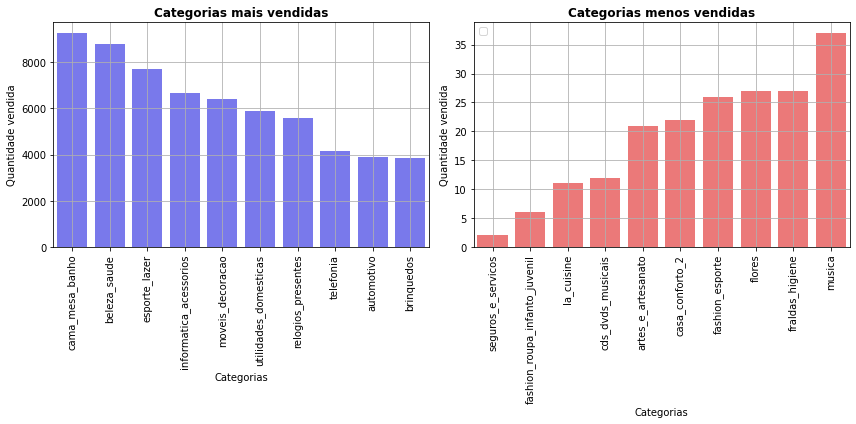

In [159]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=categorias_mais_frequentes['product_category_name'],y=categorias_mais_frequentes['order_item_id'], color='b',alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('Categorias')
plt.ylabel('Quantidade vendida')
plt.grid()
plt.title('Categorias mais vendidas',fontsize=12,weight='bold')

plt.subplot(1,2,2)
sns.barplot(x=categorias_menos_frequentes['product_category_name'],y=categorias_menos_frequentes['order_item_id'], color='r',alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('Categorias')
plt.ylabel('Quantidade vendida')
plt.title('Categorias menos vendidas',fontsize=12,weight='bold')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## **3 - Qual o valor médio de vendas?**

In [187]:
valor_venda = ordens_compra['payment_value']
print(f'O valor médio de vendas é de :R$ {valor_venda.mean():.2f}')

O valor médio de vendas é de :R$ 158.13


## **4 - Quais cidades mais compraram?**

In [188]:
ordens_compra['customer_city'].value_counts()

sao paulo               15155
rio de janeiro           6724
belo horizonte           2701
brasilia                 2086
curitiba                 1495
                        ...  
bonito de santa fe          1
cidelandia                  1
arantina                    1
bom jesus do amparo         1
conceicao do almeida        1
Name: customer_city, Length: 4095, dtype: int64

In [189]:
cidades_freq = ordens_compra.groupby('customer_city').count()
cidades_freq.reset_index(inplace=True)
cidades_freq.head(5)

,customer_city,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_state,order_item_id,...,price,freight_value,product_category_name,product_weight_g,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,abadia dos dourados,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,abadiania,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,abaete,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
3,abaetetuba,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
4,abaiara,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [190]:
cidades_mais_frequentes = cidades_freq.nlargest(10,'order_item_id')
cidades_mais_frequentes.reset_index(inplace=True)
cidades_mais_frequentes

,index,customer_city,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_state,...,price,freight_value,product_category_name,product_weight_g,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,3576,sao paulo,15155,15155,15155,15155,14811,15155,15155,15155,...,15155,15155,15155,15155,15155,15155,15155,15155,15155,15155
1,3136,rio de janeiro,6724,6724,6724,6724,6498,6724,6724,6724,...,6724,6724,6724,6724,6724,6724,6724,6724,6724,6724
2,451,belo horizonte,2701,2701,2701,2701,2649,2701,2701,2701,...,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701
3,556,brasilia,2086,2086,2086,2086,2042,2086,2086,2086,...,2086,2086,2086,2086,2086,2086,2086,2086,2086,2086
4,1139,curitiba,1495,1495,1495,1495,1474,1495,1495,1495,...,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495
5,704,campinas,1414,1414,1414,1414,1391,1414,1414,1414,...,1414,1414,1414,1414,1414,1414,1414,1414,1414,1414
6,2945,porto alegre,1352,1352,1352,1352,1322,1352,1352,1352,...,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352
7,3228,salvador,1219,1219,1219,1219,1170,1219,1219,1219,...,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219
8,1523,guarulhos,1162,1162,1162,1162,1127,1162,1162,1162,...,1162,1162,1162,1162,1162,1162,1162,1162,1162,1162
9,3409,sao bernardo do campo,909,909,909,909,893,909,909,909,...,909,909,909,909,909,909,909,909,909,909


In [191]:
print ("As 10 cidades mais comercializadas são:\n")
for i in range(0,10):
  print("{} {}: {}".format(i+1,
                           cidades_mais_frequentes['customer_city'][i],
                           cidades_mais_frequentes['order_item_id'][i]))

As 10 cidades mais comercializadas são:

1 sao paulo: 15155
2 rio de janeiro: 6724
3 belo horizonte: 2701
4 brasilia: 2086
5 curitiba: 1495
6 campinas: 1414
7 porto alegre: 1352
8 salvador: 1219
9 guarulhos: 1162
10 sao bernardo do campo: 909


Text(0.5, 1.0, 'Cidades que mais compraram')

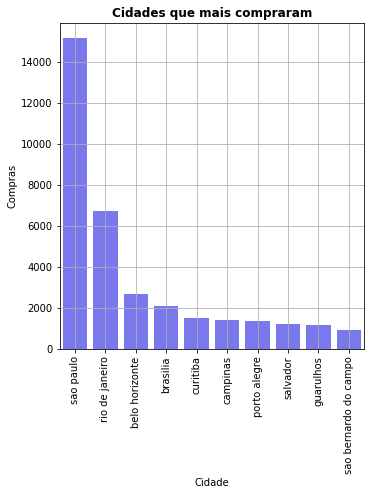

In [192]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=cidades_mais_frequentes['customer_city'],y=cidades_mais_frequentes['order_item_id'], color='b',alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('Cidade')
plt.ylabel('Compras')
plt.grid()
plt.title('Cidades que mais compraram',fontsize=12,weight='bold')


## **5 - Qual valor médio do frete?**

In [193]:
valor_frete = ordens_compra['freight_value']
print(f'O valor médio do frete é de :R$ {valor_frete.mean():.2f}')

O valor médio do frete é de :R$ 20.22


## **6 - Onde estão localizadas as lojas que mais venderam?**

In [194]:
ordens_compra['seller_city'].value_counts()

sao paulo               24220
ibitinga                 6474
santo andre              2690
curitiba                 2667
belo horizonte           2321
                        ...  
são paulo                  1
mogi das cruzes / sp        1
resende                     1
04482255                    1
tocantins                   1
Name: seller_city, Length: 604, dtype: int64

In [197]:
cidade_loja_freq = ordens_compra.groupby('seller_city').count()
cidade_loja_freq.reset_index(inplace=True)

cidades_loja_mais_frequentes = cidade_loja_freq.nlargest(10,'order_item_id')
cidades_loja_mais_frequentes.reset_index(inplace=True)

print ("As 10 cidades das lojas que mais venderam são de:\n")
for i in range(0,10):
  print("{} {}: {}".format(i+1,
                           cidades_loja_mais_frequentes['seller_city'][i],
                           cidades_loja_mais_frequentes['order_item_id'][i]))

As 10 cidades das lojas que mais venderam são de:

1 sao paulo: 24220
2 ibitinga: 6474
3 santo andre: 2690
4 curitiba: 2667
5 belo horizonte: 2321
6 rio de janeiro: 2104
7 ribeirao preto: 1981
8 sao jose do rio preto: 1940
9 maringa: 1840
10 guarulhos: 1684


Text(0.5, 1.0, 'Cidades das lojas que mais venderam')

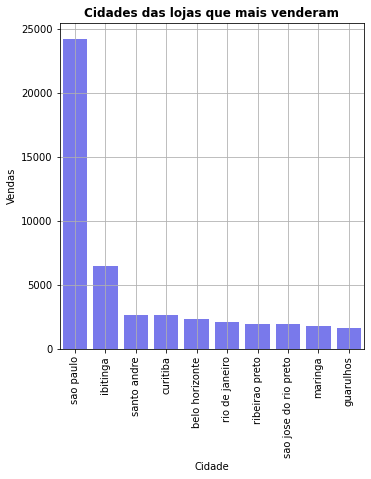

In [198]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=cidades_loja_mais_frequentes['seller_city'],y=cidades_loja_mais_frequentes['order_item_id'], color='b',alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('Cidade')
plt.ylabel('Vendas')
plt.grid()
plt.title('Cidades das lojas que mais venderam',fontsize=12,weight='bold')

## **7 - Qual a forma de pagamento mais utilizada?**

In [199]:
ordens_compra['payment_type'].value_counts()

credit_card    73815
boleto         19345
voucher         2604
debit_card      1490
Name: payment_type, dtype: int64

In [202]:
forma_pagamento_freq = ordens_compra.groupby('payment_type').count()
forma_pagamento_freq.reset_index(inplace=True)

forma_pag_freq_mais_frequentes = forma_pagamento_freq.nlargest(10,'order_item_id')
forma_pag_freq_mais_frequentes.reset_index(inplace=True)

print ("As formas de pagamento mais usadas são:\n")
for i in range(0,4):
  print("{} {}: {}".format(i+1,
                           forma_pag_freq_mais_frequentes['payment_type'][i],
                           forma_pag_freq_mais_frequentes['order_item_id'][i]))

As formas de pagamento mais usadas são:

1 credit_card: 73815
2 boleto: 19345
3 voucher: 2604
4 debit_card: 1490


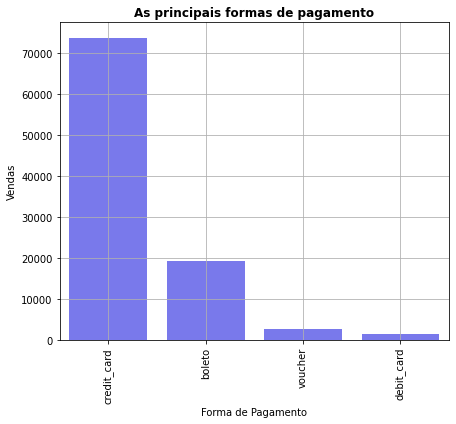

In [232]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=forma_pag_freq_mais_frequentes['payment_type'],y=forma_pag_freq_mais_frequentes['order_item_id'], color='b',alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('Forma de Pagamento')
plt.ylabel('Vendas')
plt.grid()
plt.title('As principais formas de pagamento',fontsize=12,weight='bold')
plt.tight_layout()
plt.show()

## **8 - Qual tipo de venda mais usado? À vista ou parcelado?**

In [206]:
# Mapeamento a quantas formas diferentes de pagamento foram utilizadas
Parcelas= len(ordens_compra['payment_installments'].unique())
Parcelas

24

In [229]:
# Listando o número de parcelas utilizadas
parcelas = list(ordens_compra['payment_installments'].unique())
for i in range(0,len(parcelas)):
  print("{}: Número de parcelas = {}".format(i,parcelas[i]))

0: Número de parcelas = 1
1: Número de parcelas = 3
2: Número de parcelas = 2
3: Número de parcelas = 7
4: Número de parcelas = 4
5: Número de parcelas = 8
6: Número de parcelas = 9
7: Número de parcelas = 6
8: Número de parcelas = 5
9: Número de parcelas = 10
10: Número de parcelas = 11
11: Número de parcelas = 15
12: Número de parcelas = 12
13: Número de parcelas = 0
14: Número de parcelas = 17
15: Número de parcelas = 20
16: Número de parcelas = 13
17: Número de parcelas = 24
18: Número de parcelas = 18
19: Número de parcelas = 14
20: Número de parcelas = 16
21: Número de parcelas = 22
22: Número de parcelas = 21
23: Número de parcelas = 23


In [240]:
# Levantamento do número de pedidos de vendas por forma de pagamento 
parcela_freq = ordens_compra.groupby('payment_installments').count()
parcela_freq.reset_index(inplace=True)
parcela_freq.head(15)

,payment_installments,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,...,seller_id,price,freight_value,product_category_name,product_weight_g,seller_city,seller_state,payment_sequential,payment_type,payment_value
0,0,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,1,47498,47498,47498,47498,46512,47498,47498,47498,47498,...,47498,47498,47498,47498,47498,47498,47498,47498,47498,47498
2,2,11955,11955,11955,11955,11708,11955,11955,11955,11955,...,11955,11955,11955,11955,11955,11955,11955,11955,11955,11955
3,3,10148,10148,10148,10148,9917,10148,10148,10148,10148,...,10148,10148,10148,10148,10148,10148,10148,10148,10148,10148
4,4,6896,6896,6896,6896,6738,6896,6896,6896,6896,...,6896,6896,6896,6896,6896,6896,6896,6896,6896,6896
5,5,5090,5090,5090,5090,4985,5090,5090,5090,5090,...,5090,5090,5090,5090,5090,5090,5090,5090,5090,5090
6,6,3801,3801,3801,3801,3709,3801,3801,3801,3801,...,3801,3801,3801,3801,3801,3801,3801,3801,3801,3801
7,7,1570,1570,1570,1570,1521,1570,1570,1570,1570,...,1570,1570,1570,1570,1570,1570,1570,1570,1570,1570
8,8,4170,4170,4170,4170,4055,4170,4170,4170,4170,...,4170,4170,4170,4170,4170,4170,4170,4170,4170,4170
9,9,625,625,625,625,608,625,625,625,625,...,625,625,625,625,625,625,625,625,625,625


In [226]:
# Listando o número de pedidos pela quantidade de parcelas mais adotada
parcela_mais_frequentes = parcela_freq.nlargest(23,'order_id')
parcela_mais_frequentes.reset_index(inplace=True)
parcela_mais_frequentes

,index,payment_installments,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_id,price,freight_value,product_category_name,product_weight_g,seller_city,seller_state,payment_sequential,payment_type,payment_value
0,1,1,47498,47498,47498,47498,46512,47498,47498,47498,...,47498,47498,47498,47498,47498,47498,47498,47498,47498,47498
1,2,2,11955,11955,11955,11955,11708,11955,11955,11955,...,11955,11955,11955,11955,11955,11955,11955,11955,11955,11955
2,3,3,10148,10148,10148,10148,9917,10148,10148,10148,...,10148,10148,10148,10148,10148,10148,10148,10148,10148,10148
3,4,4,6896,6896,6896,6896,6738,6896,6896,6896,...,6896,6896,6896,6896,6896,6896,6896,6896,6896,6896
4,10,10,5165,5165,5165,5165,5042,5165,5165,5165,...,5165,5165,5165,5165,5165,5165,5165,5165,5165,5165
5,5,5,5090,5090,5090,5090,4985,5090,5090,5090,...,5090,5090,5090,5090,5090,5090,5090,5090,5090,5090
6,8,8,4170,4170,4170,4170,4055,4170,4170,4170,...,4170,4170,4170,4170,4170,4170,4170,4170,4170,4170
7,6,6,3801,3801,3801,3801,3709,3801,3801,3801,...,3801,3801,3801,3801,3801,3801,3801,3801,3801,3801
8,7,7,1570,1570,1570,1570,1521,1570,1570,1570,...,1570,1570,1570,1570,1570,1570,1570,1570,1570,1570
9,9,9,625,625,625,625,608,625,625,625,...,625,625,625,625,625,625,625,625,625,625


In [227]:
print ("O número de parcelas mais utilizados são:\n")
for i in range(0,23):
  print("{} {}: {}".format(i+1,
                           parcela_mais_frequentes['payment_installments'][i],
                           parcela_mais_frequentes['order_id'][i]))

O número de parcelas mais utilizados são:

1 1: 47498
2 2: 11955
3 3: 10148
4 4: 6896
5 10: 5165
6 5: 5090
7 8: 4170
8 6: 3801
9 7: 1570
10 9: 625
11 12: 130
12 15: 73
13 18: 27
14 11: 22
15 24: 18
16 20: 17
17 13: 16
18 14: 14
19 17: 7
20 16: 5
21 21: 3
22 0: 2
23 22: 1


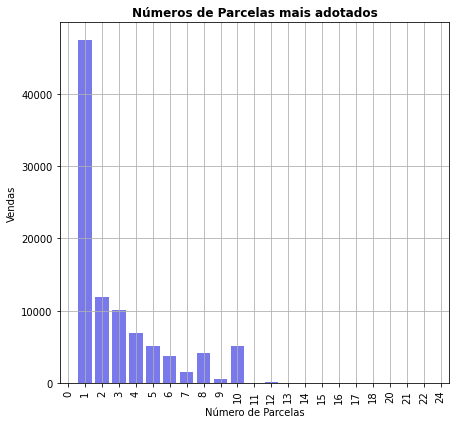

In [233]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=parcela_mais_frequentes['payment_installments'],y=parcela_mais_frequentes['order_id'], color='b',alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('Número de Parcelas')
plt.ylabel('Vendas')
plt.grid()
plt.title('Números de Parcelas mais adotados',fontsize=12,weight='bold')
plt.tight_layout()
plt.show()

## **9 - Qual a média da frequência de categoria dos produtos?**

In [244]:
print("A média da frequência das categorias de produtos é de {:.4f}".format(sts.mean(categorias_freq['order_id'])))

A média da frequência das categorias de produtos é de 1369.7746


## **10 - Quantas ordens de compras foram concluídas?**

In [250]:
ordens_compra['order_status'].value_counts()

delivered      95125
shipped         1082
canceled         445
invoiced         305
processing       289
unavailable        6
approved           2
Name: order_status, dtype: int64

In [254]:
status_ordem_freq = ordens_compra.groupby('order_status').count()
status_ordem_freq.reset_index(inplace=True)
status_ordem_freq.head(5)

status_ordem_mais_frequentes = status_ordem_freq.nlargest(7,'order_id')
status_ordem_mais_frequentes.reset_index(inplace=True)
status_ordem_mais_frequentes

print ("O status das ordens de compra foram:\n")
for i in range(0,7):
  print("{} {}: {}".format(i+1,
                           status_ordem_mais_frequentes['order_status'][i],
                           status_ordem_mais_frequentes['order_id'][i]))

O status das ordens de compra foram:

1 delivered: 95125
2 shipped: 1082
3 canceled: 445
4 invoiced: 305
5 processing: 289
6 unavailable: 6
7 approved: 2


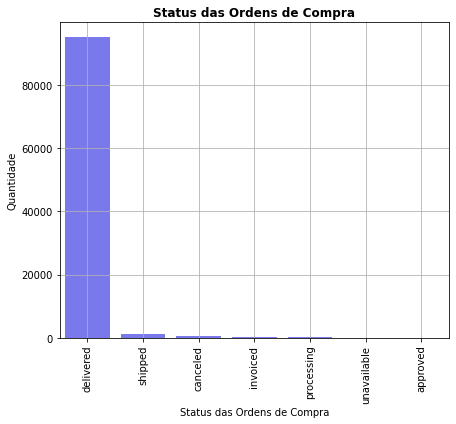

In [255]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=status_ordem_mais_frequentes['order_status'],y=status_ordem_mais_frequentes['order_id'], color='b',alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('Status das Ordens de Compra')
plt.ylabel('Quantidade')
plt.grid()
plt.title('Status das Ordens de Compra',fontsize=12,weight='bold')
plt.tight_layout()
plt.show()